#  DL Practical No. : 9
## Name : Priyank Maheshwari
## Roll No. : 52
## Section & Batch : A3

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

## Dataset - German Sign Traffic Sign Recognition Benchmark (GSTRB)

In [2]:
!unzip "/content/Traffic Sign_Train.zip" -d "/content/Traffic Sign_Train"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00010.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00011.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00012.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00013.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00014.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00015.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00016.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00017.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00018.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00019.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00020.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00021.png  
  inflating: /content/Traffic Sign_Train/Train/5/00005_00053_00022.png  


In [3]:
data_dir = "/content/Traffic Sign_Train/Train"
IMG_SIZE = 32

In [4]:
images = []
labels = []

for class_id in range(43):
    class_path = os.path.join(data_dir, str(class_id))
    for img_name in tqdm(os.listdir(class_path)):
        try:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(class_id)
        except:
            pass

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images")

100%|██████████| 240/240 [00:00<00:00, 9018.31it/s]


Loaded 39209 images


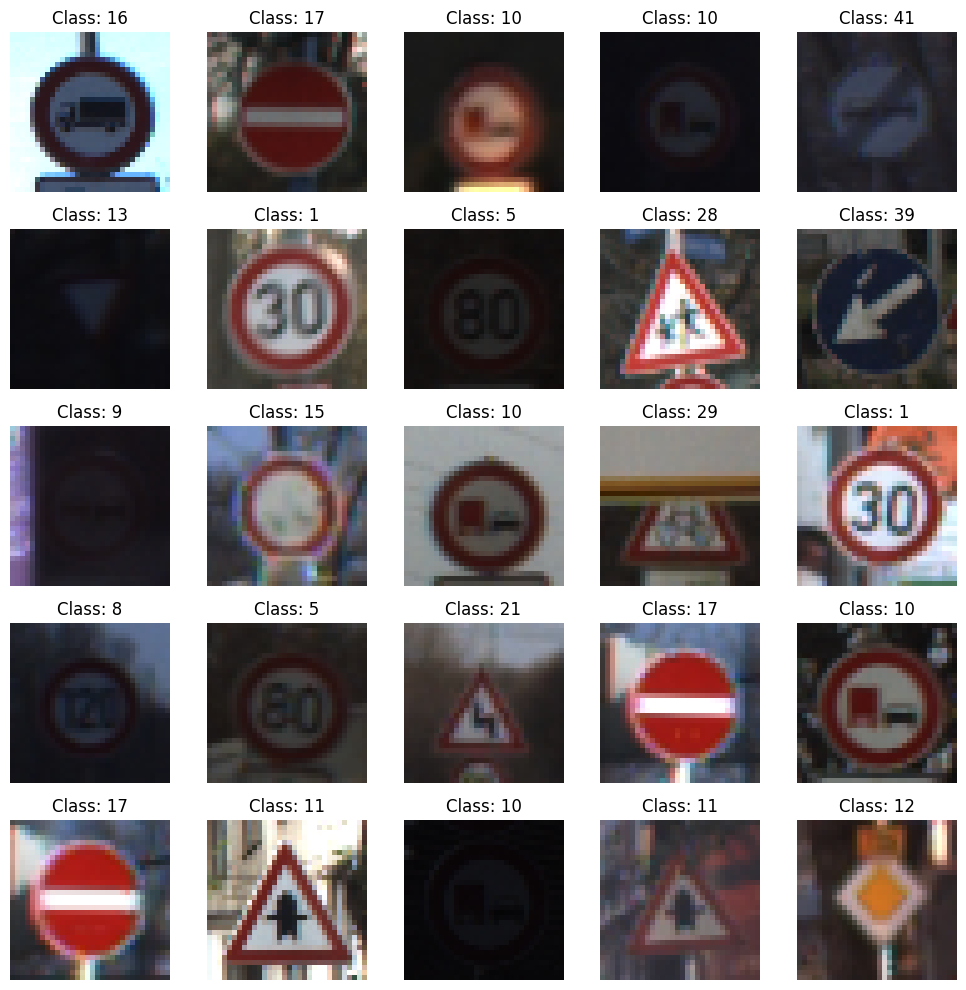

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    idx = random.randint(0, len(images)-1)
    plt.subplot(5, 5, i+1)
    plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
    plt.title(f"Class: {labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<ipython-input-6-eb7bf6887749>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette="tab20")


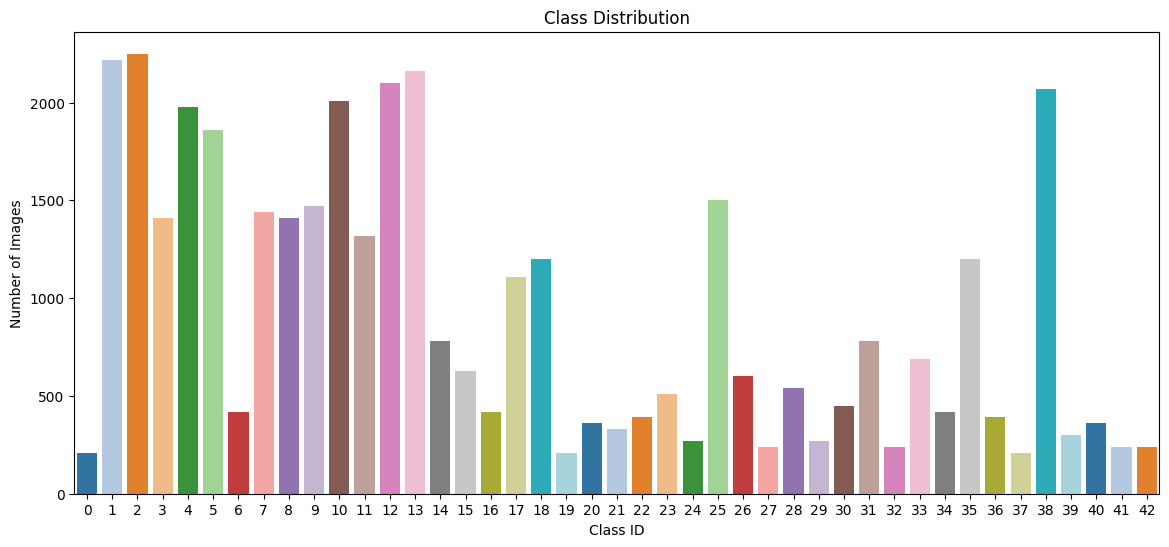

In [6]:
plt.figure(figsize=(14, 6))
sns.countplot(x=labels, palette="tab20")
plt.title("Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

images = images.astype('float32') / 255.0
labels_encoded = to_categorical(labels, num_classes=43)

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode="nearest"
)
datagen.fit(X_train)

## Model 1 : ANN

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model_ann = Sequential([
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_ann.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,715,755 (6.55 MB)

 Trainable params: 1,715,755 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history_ann = model_ann.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=30
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.0706 - loss: 3.5940 - val_accuracy: 0.1630 - val_loss: 3.0164
Epoch 2/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.1178 - loss: 3.1797 - val_accuracy: 0.2317 - val_loss: 2.7640
Epoch 3/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.1344 - loss: 3.0875 - val_accuracy: 0.2566 - val_loss: 2.6493
Epoch 4/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.1514 - loss: 3.0127 - val_accuracy: 0.2526 - val_loss: 2.6002
Epoch 5/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.1558 - loss: 2.9629 - val_accuracy: 0.2771 - val_loss: 2.4548
Epoch 6/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.1638 - loss: 2.9376 - val_accuracy: 0.2744 - val_loss: 2.4069
Epoch 7/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.1676 - loss: 2.9020 - val_accuracy: 0.2768 - val_loss: 2.4193
Epoch 8/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.1728 - loss: 2.8782 - val_accurac

In [11]:
test_loss, test_accuracy = model_ann.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.2884


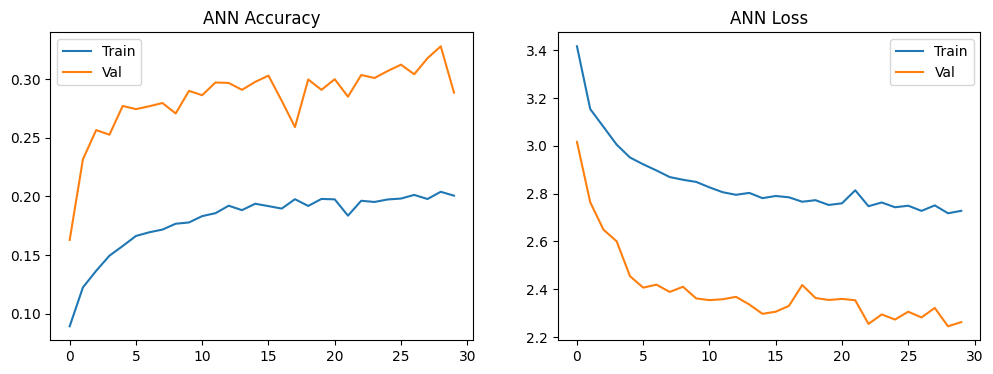

In [12]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.show()

plot_history(history_ann, "ANN")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

ANN Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.03      0.01      0.01       496
           2       0.22      0.30      0.25       450
           3       0.00      0.00      0.00       280
           4       0.12      0.02      0.04       418
           5       0.13      0.51      0.21       364
           6       0.23      0.85      0.37        59
           7       0.10      0.17      0.13       278
           8       0.03      0.00      0.01       301
           9       0.62      0.02      0.04       268
          10       0.25      0.91      0.40       370
          11       0.14      0.31      0.19       236
          12       0.78      0.90      0.84       450
          13       0.90      0.71      0.79       452
          14       0.00      0.00      0.00       162
          15       0.00      0.00      0.00       120
          1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


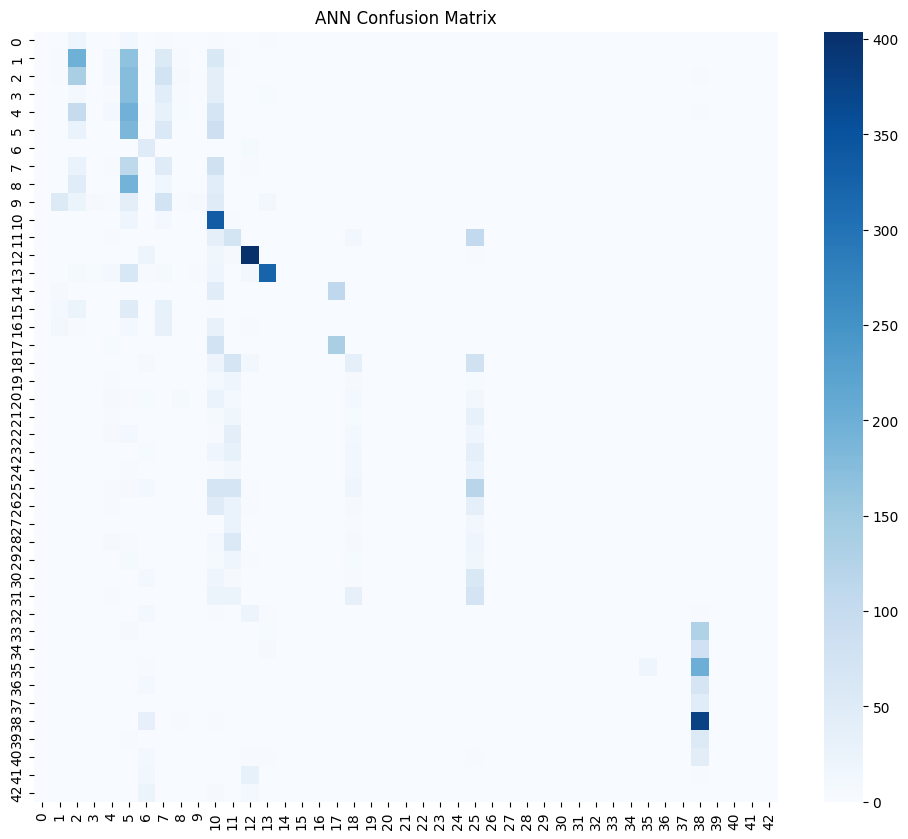

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_true, y_pred_labels))

    plt.figure(figsize=(12, 10))
    sns.heatmap(confusion_matrix(y_true, y_pred_labels), annot=False, cmap="Blues", fmt='d')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

evaluate_model(model_ann, "ANN")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


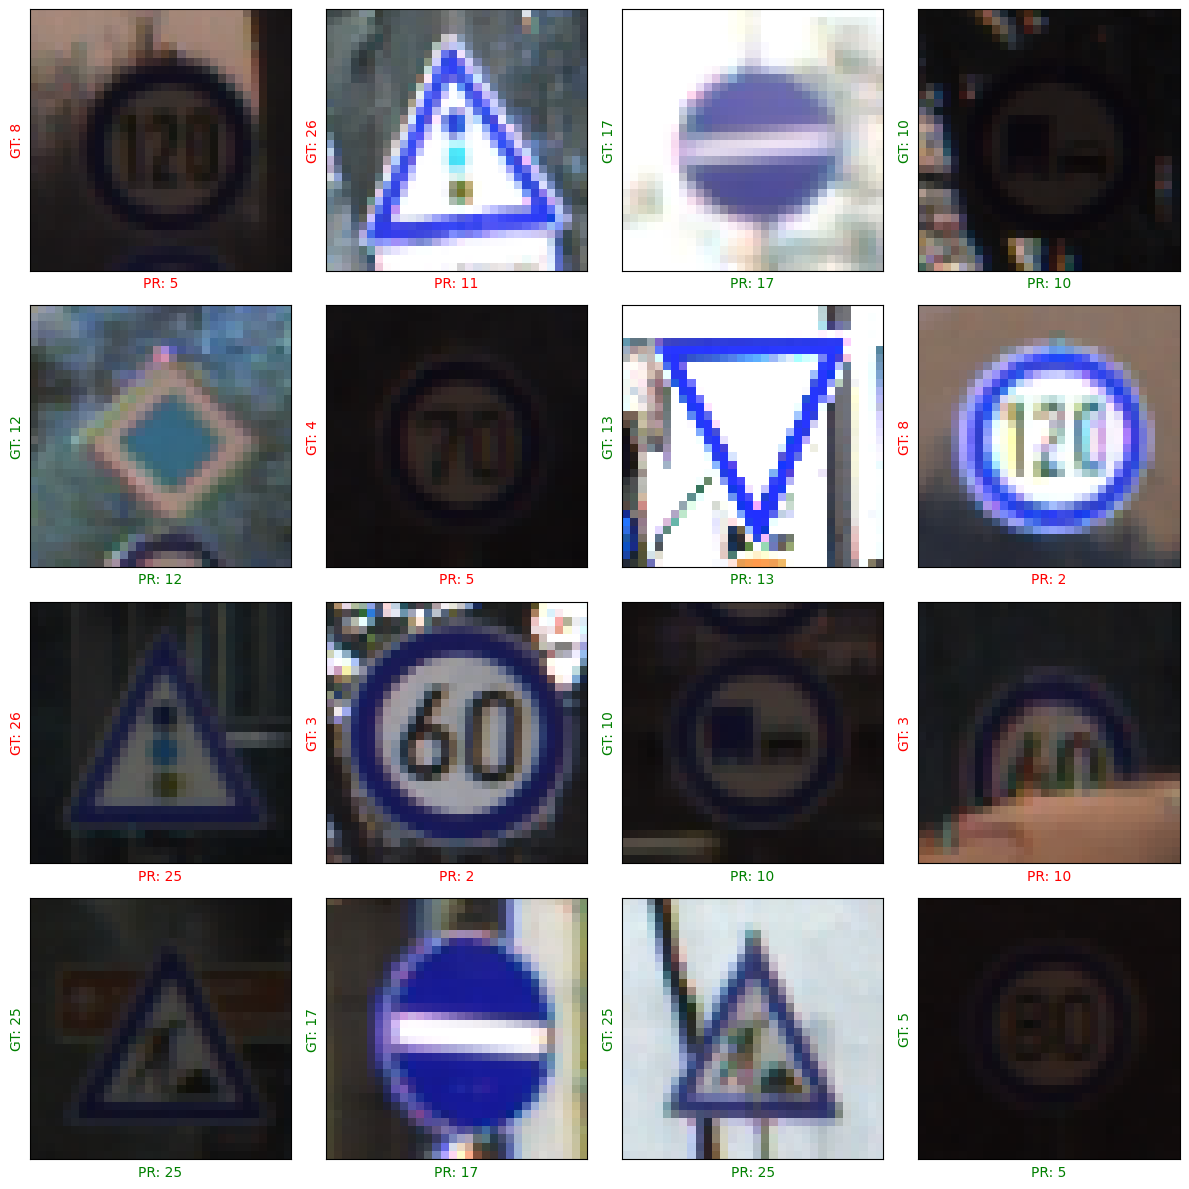

In [14]:
def test_model(model, test_data, show=True):
    x, y_true = next(test_data)
    pred = model.predict(x)
    pred_class = np.argmax(pred[0])
    true_class = np.argmax(y_true[0])

    plt.imshow(x[0])
    if show:
        print(f'GT: {true_class} | Pred: {pred_class}')
        plt.show()
    else:
        col = 'green' if true_class == pred_class else 'red'
        plt.ylabel(f'GT: {true_class}', color=col)
        plt.xlabel(f'PR: {pred_class}', color=col)
        plt.xticks([]); plt.yticks([])

test_gen = ImageDataGenerator().flow(X_test, y_test, batch_size=1)

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    test_model(model_ann, test_gen, show=False)
plt.tight_layout()
plt.show()

## Model 2 : CNN

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,523 (923.92 KB)

 Trainable params: 236,075 (922.17 KB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
history_cnn = model_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=15
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.3693 - loss: 2.4188 - val_accuracy: 0.8430 - val_loss: 0.5651
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8555 - loss: 0.4478 - val_accuracy: 0.9708 - val_loss: 0.0987
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9323 - loss: 0.2158 - val_accuracy: 0.9709 - val_loss: 0.0877
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.9539 - loss: 0.1478 - val_accuracy: 0.9870 - val_loss: 0.0408
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9662 - loss: 0.1079 - val_accuracy: 0.9865 - val_loss: 0.0417
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9694 - loss: 0.0964 - val_accuracy: 0.9876 - val_loss: 0.0406
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9681 - loss: 0.1064 - val_accuracy: 0.9874 - val_loss: 0.0420
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9765 - loss: 0.0753 - val_accurac

In [17]:
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9967


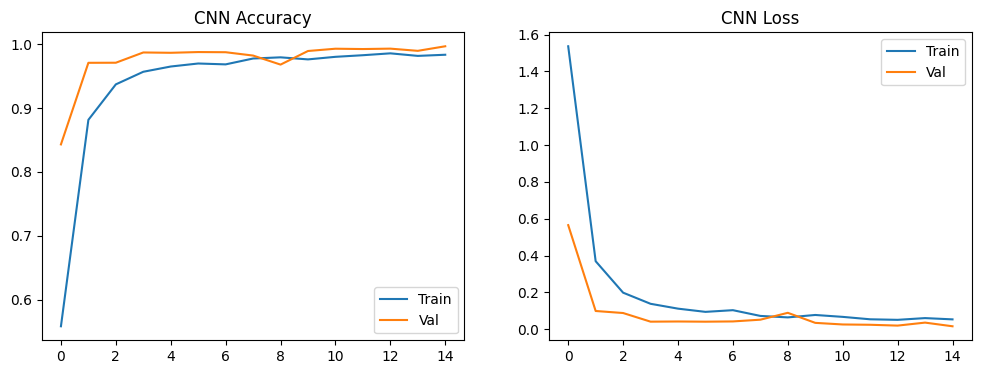

In [18]:
plot_history(history_cnn, "CNN")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

CNN Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.99      1.00      0.99       496
           2       1.00      0.99      1.00       450
           3       1.00      0.99      0.99       280
           4       1.00      1.00      1.00       418
           5       0.98      1.00      0.99       364
           6       1.00      1.00      1.00        59
           7       1.00      0.99      0.99       278
           8       0.99      0.99      0.99       301
           9       1.00      1.00      1.00       268
          10       1.00      1.00      1.00       370
          11       0.99      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00       120
          1

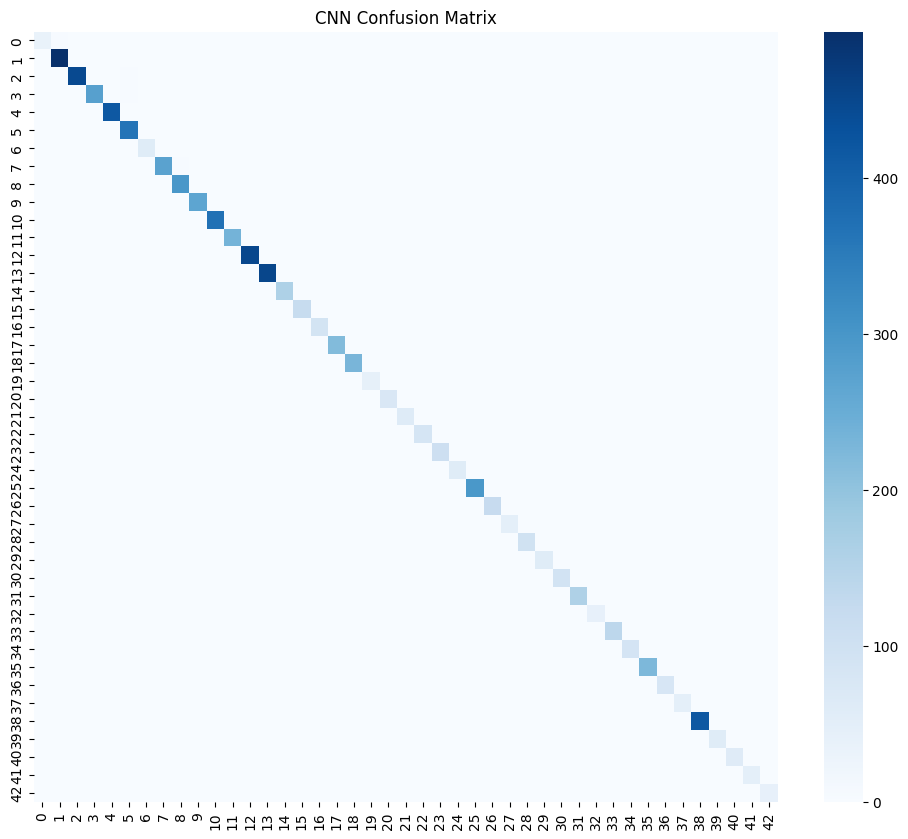

In [19]:
evaluate_model(model_cnn, "CNN")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


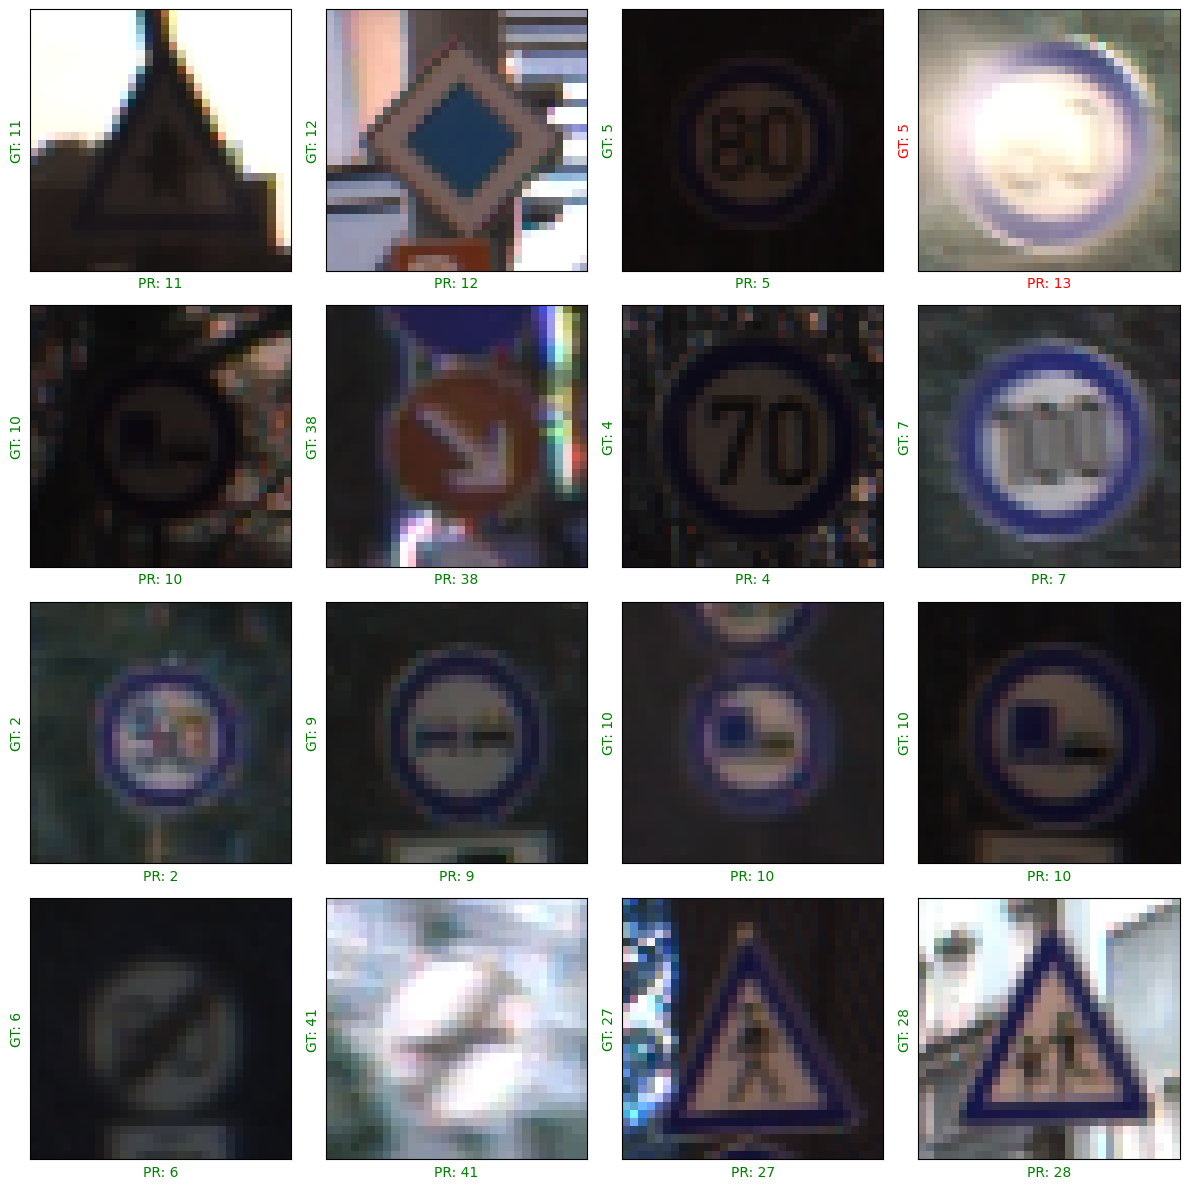

In [20]:
def test_model(model, test_data, show=True):
    x, y_true = next(test_data)
    pred = model.predict(x)
    pred_class = np.argmax(pred[0])
    true_class = np.argmax(y_true[0])

    plt.imshow(x[0])
    if show:
        print(f'GT: {true_class} | Pred: {pred_class}')
        plt.show()
    else:
        col = 'green' if true_class == pred_class else 'red'
        plt.ylabel(f'GT: {true_class}', color=col)
        plt.xlabel(f'PR: {pred_class}', color=col)
        plt.xticks([]); plt.yticks([])

test_gen = ImageDataGenerator().flow(X_test, y_test, batch_size=1)

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    test_model(model_cnn, test_gen, show=False)
plt.tight_layout()
plt.show()

## Model 3 : Deeper CNN

In [21]:
model_deep_cnn = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model_deep_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_deep_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,330,475 (16.52 MB)

 Trainable params: 4,329,963 (16.52 MB)

 Non-trainable params: 512 (2.00 KB)

In [22]:
history_deep_cnn = model_deep_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=15
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.2232 - loss: 3.3345 - val_accuracy: 0.5613 - val_loss: 1.4087
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.5856 - loss: 1.2753 - val_accuracy: 0.8604 - val_loss: 0.4549
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7581 - loss: 0.7515 - val_accuracy: 0.8990 - val_loss: 0.3747
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8495 - loss: 0.4788 - val_accuracy: 0.9847 - val_loss: 0.0655
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8891 - loss: 0.3548 - val_accuracy: 0.9756 - val_loss: 0.0740
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9188 - loss: 0.2624 - val_accuracy: 0.9935 - val_loss: 0.0176
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9307 - loss: 0.2338 - val_accuracy: 0.9799 - val_loss: 0.0661
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9350 - loss: 0.2201 - val_accurac

In [23]:
test_loss, test_accuracy = model_deep_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9982


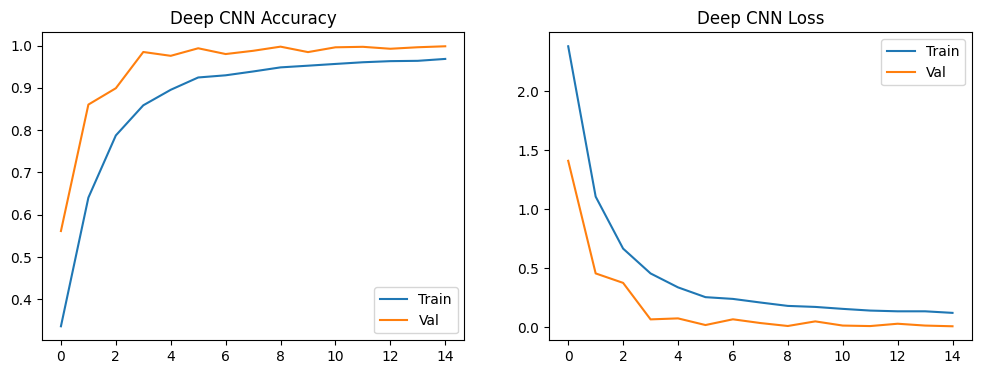

In [24]:
plot_history(history_deep_cnn, "Deep CNN")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Deep CNN Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.99      1.00       496
           2       1.00      1.00      1.00       450
           3       1.00      1.00      1.00       280
           4       1.00      1.00      1.00       418
           5       0.99      1.00      1.00       364
           6       1.00      1.00      1.00        59
           7       0.99      1.00      0.99       278
           8       1.00      1.00      1.00       301
           9       1.00      1.00      1.00       268
          10       1.00      1.00      1.00       370
          11       1.00      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00       120
      

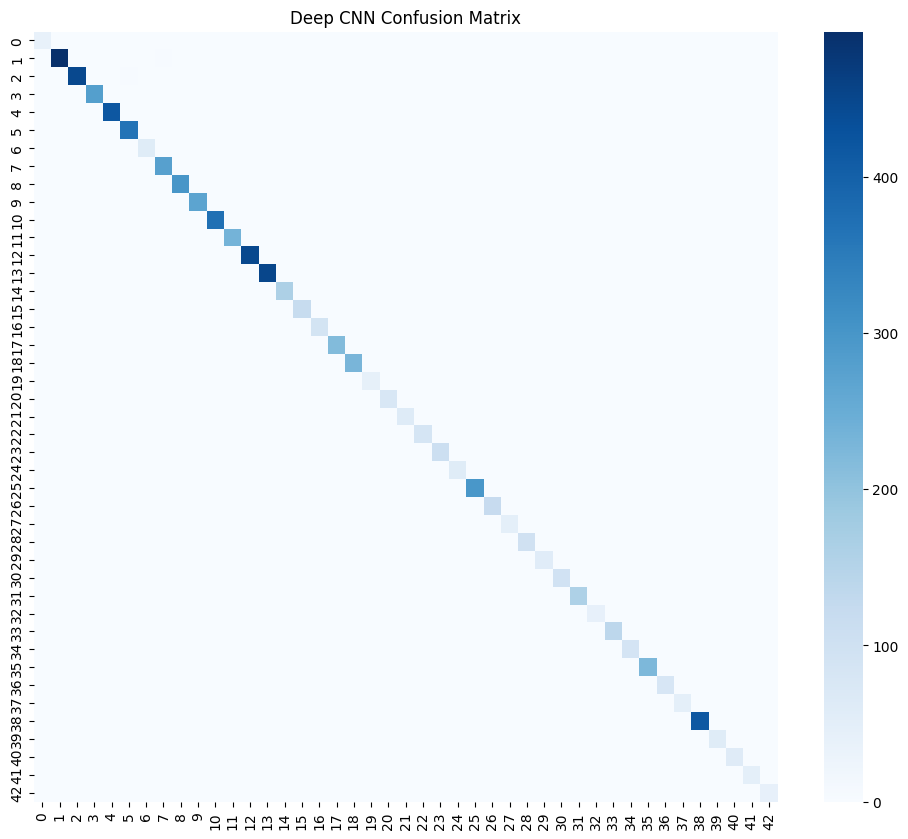

In [25]:
evaluate_model(model_deep_cnn, "Deep CNN")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


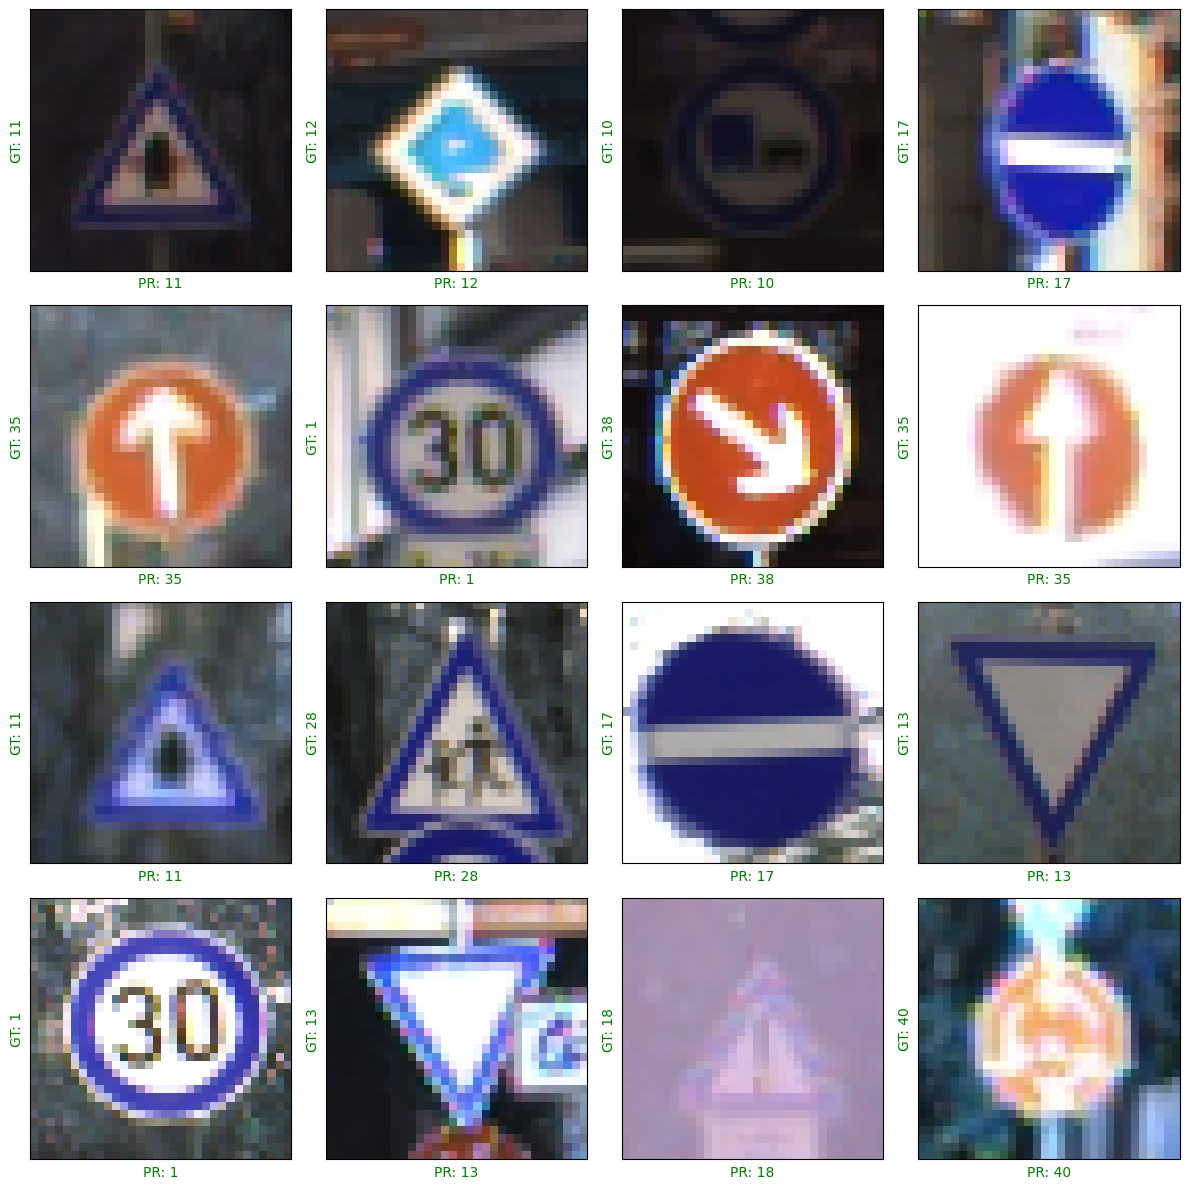

In [26]:
def test_model(model, test_data, show=True):
    x, y_true = next(test_data)
    pred = model.predict(x)
    pred_class = np.argmax(pred[0])
    true_class = np.argmax(y_true[0])

    plt.imshow(x[0])
    if show:
        print(f'GT: {true_class} | Pred: {pred_class}')
        plt.show()
    else:
        col = 'green' if true_class == pred_class else 'red'
        plt.ylabel(f'GT: {true_class}', color=col)
        plt.xlabel(f'PR: {pred_class}', color=col)
        plt.xticks([]); plt.yticks([])

test_gen = ImageDataGenerator().flow(X_test, y_test, batch_size=1)

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    test_model(model_deep_cnn, test_gen, show=False)
plt.tight_layout()
plt.show()